## Genomics data analysis based on R

HW1-TangMingchuan-2000017785-Peking University

*My Jupyternotebook failed to export latex pdf with Chinese characters, sorry if my English troubles you.*

# A


In [10]:
# 1
college <- read.csv("./College.csv")


In [11]:
# 2
row <- nrow(college)
col <- ncol(college)
cat("row =", row, "\ncol =", col)


row = 777 
col = 19

In [12]:
# 3
rownames(college) <- college[, 1]
college <- college[, -c(1:1)]
college[c(0:10), c(0:5)]
college["Private"] <- factor(college[["Private"]], levels = c("Yes", "No"), labels = c("Yes", "No"))


,Private,Apps,Accept,Enroll,Top10perc
,<chr>,<int>,<int>,<int>,<int>
Abilene Christian University,Yes,1660,1232,721,23
Adelphi University,Yes,2186,1924,512,16
Adrian College,Yes,1428,1097,336,22
Agnes Scott College,Yes,417,349,137,60
Alaska Pacific University,Yes,193,146,55,16
Albertson College,Yes,587,479,158,38
Albertus Magnus College,Yes,353,340,103,17
Albion College,Yes,1899,1720,489,37
Albright College,Yes,1038,839,227,30


In [15]:
# 4
Apps_mean <- mean(college[["Apps"]])
Accept_mean <- mean(college[["Accept"]])
Apps_Accept_coor <- cor(college[["Apps"]], college[["Accept"]])

cat("Apps_mean:", Apps_mean, "\nAccept_mean:", Accept_mean, "\nCor:", Apps_Accept_coor)


Apps_mean: 3001.638 
Accept_mean: 2018.804 
Cor: 0.9434506

In [16]:
# 5
summary(college[, c(0:3)])


 Private        Apps           Accept     
 Yes:565   Min.   :   81   Min.   :   72  
 No :212   1st Qu.:  776   1st Qu.:  604  
           Median : 1558   Median : 1110  
           Mean   : 3002   Mean   : 2019  
           3rd Qu.: 3624   3rd Qu.: 2424  
           Max.   :48094   Max.   :26330  

As above, 1st Qu and 3st Qu represent 25 percentile and 75 percentile respectively.

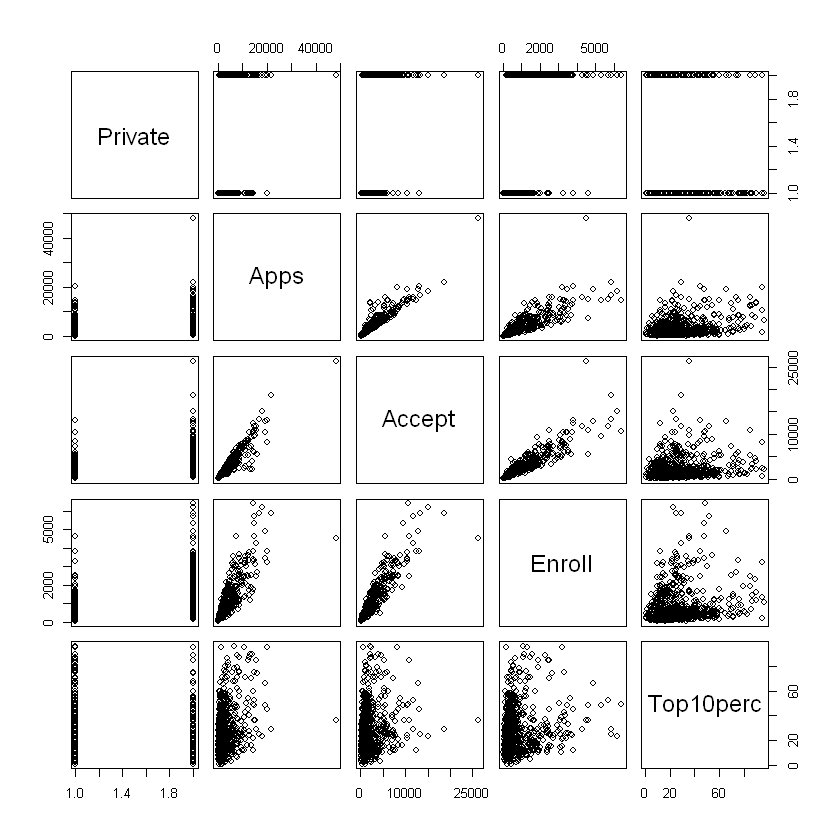

In [17]:
# 6
pairs(college[, c(0:5)])

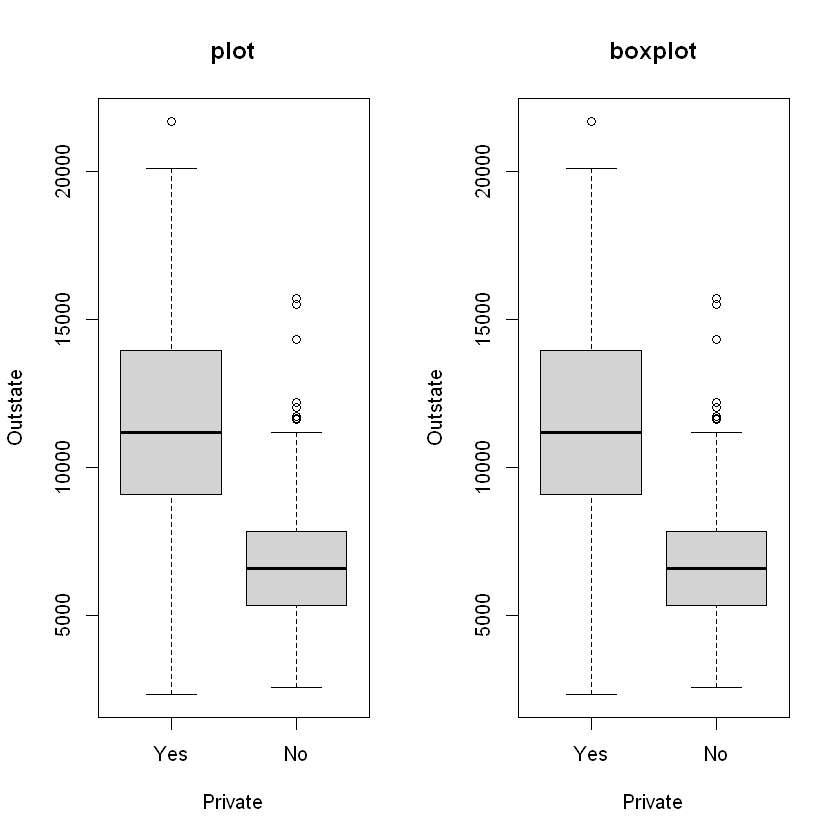

In [18]:
# 7
par(mfrow = c(1, 2))

plot_boxplot <- plot(college[["Private"]], college[["Outstate"]],
    xlab = "Private",
    ylab = "Outstate",
    main = 'plot',
)

boxplot_boxplot <- boxplot(college[["Outstate"]] ~ college[["Private"]],
    xlab = "Private",
    ylab = "Outstate",
    main = 'boxplot'
)


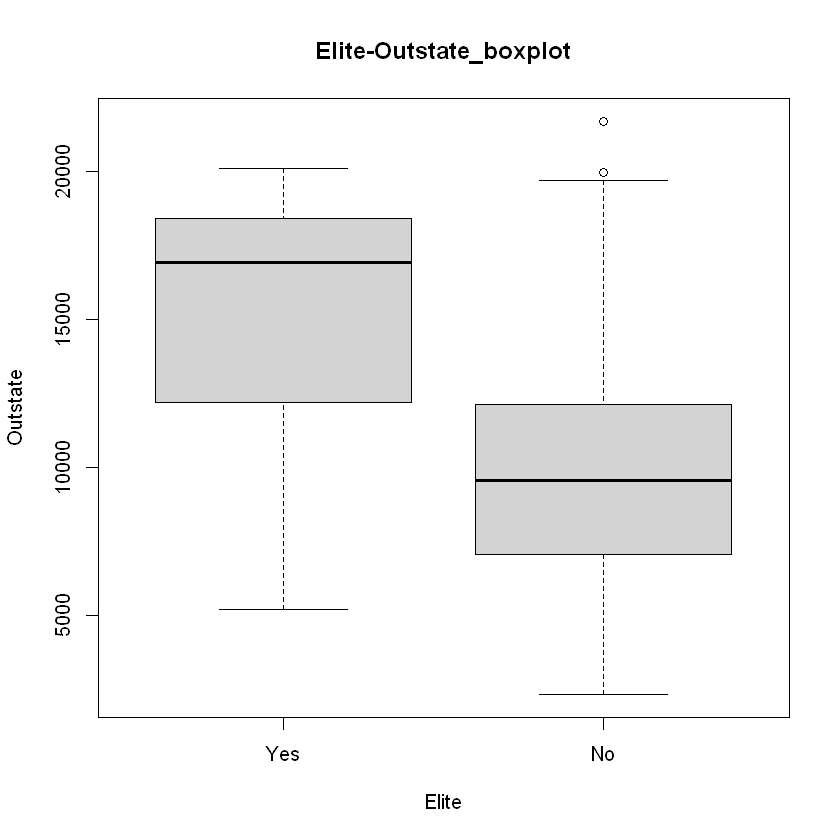

In [19]:
# 8
college["Elite"] <- factor(college[["Top10perc"]] > 50, levels = c(TRUE, FALSE), labels = c("Yes", "No"))
boxplot(college[["Outstate"]] ~ college[["Elite"]],
    xlab = "Elite",
    ylab = "Outstate",
    main = "Elite-Outstate_boxplot"
)


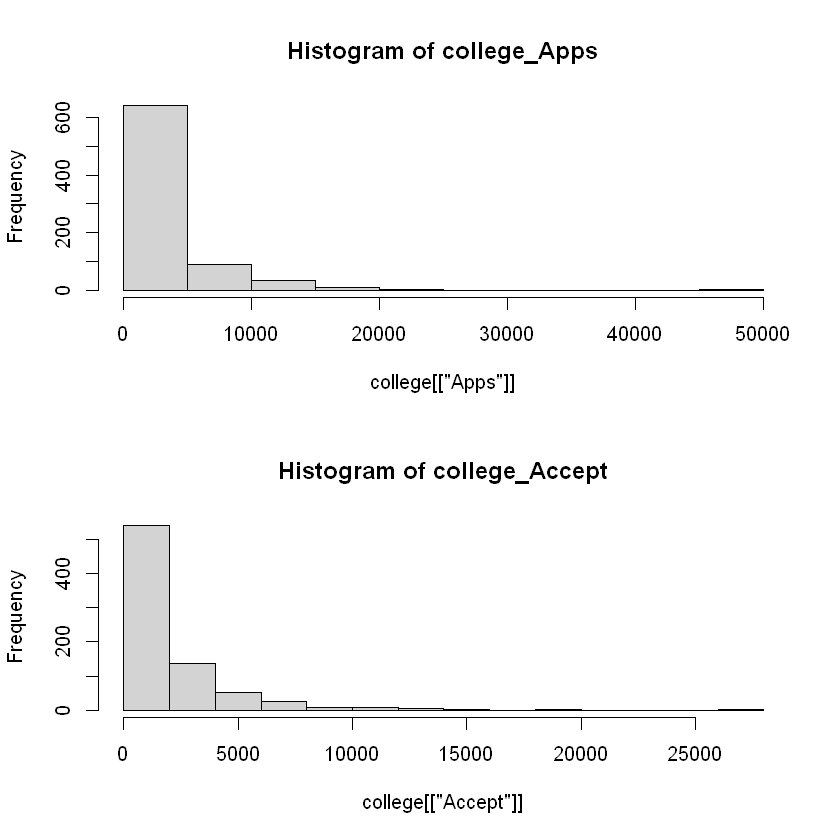

In [20]:
# 9
layout(matrix(c(1, 2), 2, 1, byrow = TRUE), widths = c(1, 1))
hist(college[["Apps"]], main = "Histogram of college_Apps")
hist(college[["Accept"]], main = "Histogram of college_Accept")


In [37]:
# 10
write.csv(college, file = "./College_Elite_added.csv")


# B

In [21]:
# 11
Auto <- read.csv("./Auto.csv", na.strings = "?")
Auto <- na.omit(Auto)
Auto[c(1:10),c(1:5)]

,mpg,cylinders,displacement,horsepower,weight
,<dbl>,<int>,<dbl>,<int>,<int>
1,18,8,307,130,3504
2,15,8,350,165,3693
3,18,8,318,150,3436
4,16,8,304,150,3433
5,17,8,302,140,3449
6,15,8,429,198,4341
7,14,8,454,220,4354
8,14,8,440,215,4312
9,14,8,455,225,4425


In [22]:
# 12
relation <- lm(mpg ~ horsepower, data = Auto)
summary(relation)

predict(relation, data.frame(horsepower = c(98)), interval = "confidence")
predict(relation, data.frame(horsepower = c(98)), interval = "prediction")



Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


,fit,lwr,upr
1,24.46708,23.97308,24.96108


,fit,lwr,upr
1,24.46708,14.8094,34.12476


As summary above，predictor and outcome variable can be described as: mpg ~ 39.9 - 0.16 * horsepower, R-squared ~ 0.6, correlation is relative strong, negative correlation.

when horsepower = 98, mpg is expected to be 24.22. 95% confidence and prediction range are (23.97308, 24.96108) and (14.8094, 34.12476) respectively.

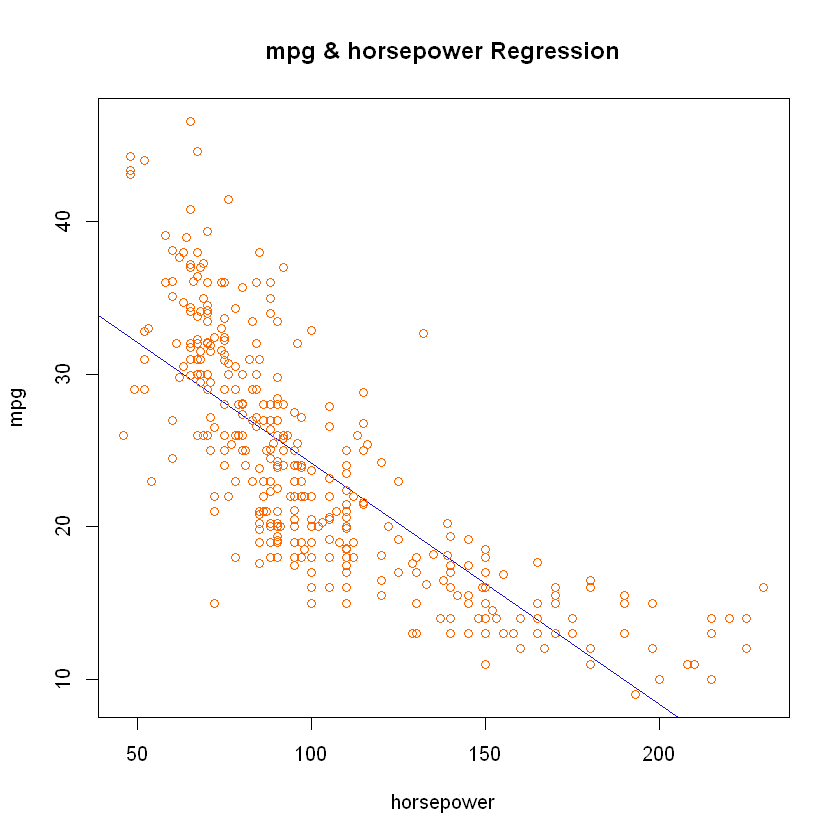

In [23]:
# 13
plot(Auto[["horsepower"]], Auto[["mpg"]],
    main = "mpg & horsepower Regression", col = "#ff6600",
    abline(relation, col = "#190dce"), xlab = "horsepower", ylab = "mpg"
)


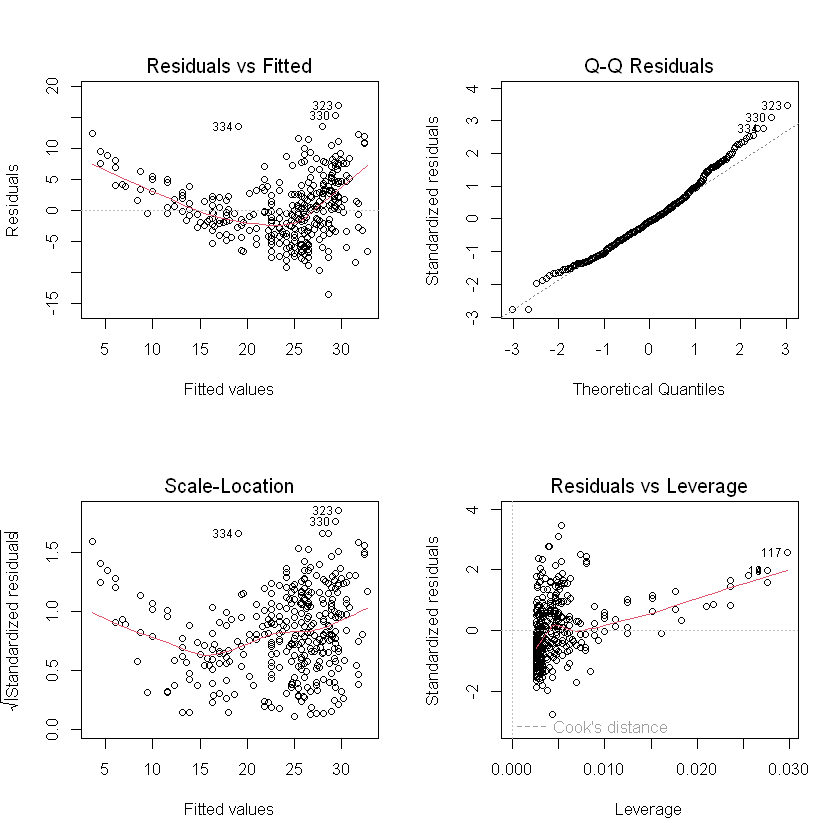

In [98]:
# 14
par(mfrow = c(2, 2))
plot(relation)


1. Residuals vs Fitted. This fig shows that there could be a non-linear relationship between predictor variable and the outcome variable because the U-shape residual instead of a horizontal line.
2. Normal Q-Q. This plot shows if residuals are normally distributed. In this case, residuals follow a straight line well, indicating the resiiduals is expected to be normally distributed.
3. Scale-Location. This plot shows if residuals are spread equally along the ranges of predictors. In this case, the U-shaped curve indicates that the residuals spread wider when fitted valus is small and large.
4. Residuals vs Leverage. This plot helps us to find influential cases (i.e., subjects) if there are any. From the plot there is no influential case, or cases.

> reference:
>
> [Understanding Diagnostic Plots for Linear Regression Analysis](https://library.virginia.edu/data/articles/diagnostic-plots)
>
> https://blog.csdn.net/qq_35837578/article/details/88357551


# C

In [2]:
# 15
X <- sum(sample(
    x = c(-1, 1), size = 10,
    replace = TRUE
))
X

[1] 6

In [1]:
# 16
simulate_coin_flips <- function(Ntrials, Nflips) {
    sequences <- replicate(Ntrials, sample(c(1, -1), Nflips, replace = TRUE))
    return(sequences)
}

calculate_average_X <- function(sequences) {
    idx <- apply(
        sequences, 2,
        function(sequence) {
            return(which(sequence == 1)[5] == 5)
        }
    )
    idx <- ifelse(is.na(idx), FALSE, idx)
    step <- apply(sequences[, idx], 2, sum)
    mean_value <- mean(step)
    return(c(mean_value, step))
}

Ntrials <- 200
Nflips <- 10

sequences <- simulate_coin_flips(Ntrials, Nflips)
average_X <- calculate_average_X(sequences)

cat("mean_value_X:", average_X[1])


mean_value_X: 6.5

mean_value_X_series: -8.583333 17.16129 -4.608696 12.72131 -2.412698 -0.4193548 0.9275362 -18.26087 -8.142857 13.43284 -8.734177 15.25806 3.272727 19.65385 7.508197 -2.947368 -7.933333 4.516129 -3.087719 6.328358 0.3793103 10.78571 3.575758 20.98182 7.783784 -4.076923 8.275862 0.1851852 -3.555556 -6.771429 -9.875 13.46479 3.740741 -10.35294 14 3.275362 -20.8 7.151515 27.22581 8.103448 6.507937 10.44068 -3.333333 12.03571 1.527273 -2.415094 14.08511 30.55385 17.09375 10.46377

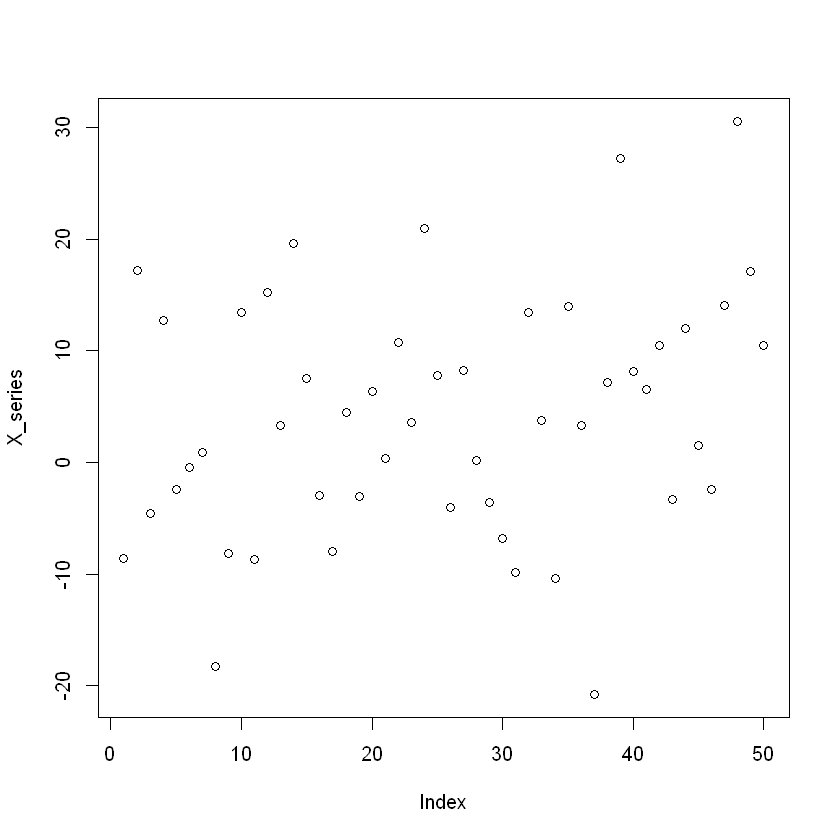

In [7]:
# 17
Ntrials <- 2000
Nflips <- 8000

average <- function(Ntrials, Nflips) {
    sequences <- simulate_coin_flips(Ntrials, Nflips)
    average_X <- calculate_average_X(sequences)
    return(average_X[1])
}

X_series <- replicate(50, average(Ntrials, Nflips))

cat("mean_value_X_series:", X_series)
plot(X_series)

As shown above, the mean valuse didn't converge to 0. The limit of 5 head beginning make the sum of each trial begins with 5 and the mean value of later flips is expected to be 0, making the theoratical mean value of each trial to be 5.

If Nflips is an even number N = 2n, then $P(sum = 2a) = {C_{2n}^{n-a}}/{2^N}$. From hist drawn as follows, we can see that the distribution is "wider" as flip number increases (bigger std). So the mean value is not converged to 0 (not converged to 5 in this case).

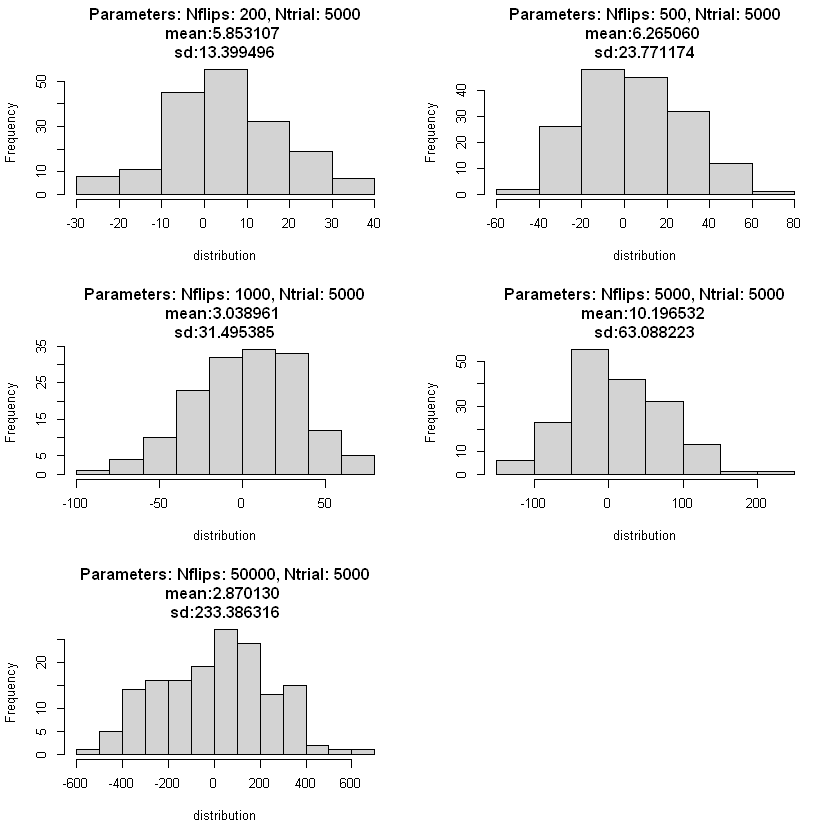

In [6]:
# 18
par(mfrow = c(3, 2))
Ntrials <- 5000

for (Nflips in c(200, 500, 1000, 5000, 50000)) {
    sequences <- simulate_coin_flips(Ntrials, Nflips)
    average_X <- calculate_average_X(sequences)
    distribution <- average_X[2:length(average_X)]

    hist(distribution,
        main = sprintf(
            "Parameters: Nflips: %d, Ntrial: %d\nmean:%f \nsd:%f",
            Nflips, Ntrials, average_X[1], sd(distribution)
        )
    )
}
